# HW Method for Time-series forecasting

### <font color=blue>Simple Exponential Smoothing / Simple Moving Average</font>
This is the simplest to forecast. $\hat{y}$ is equal to the most recent value in the dataset, and the forecast plot is simply a horizontal line extending from the most recent value.
### <font color=blue>Double Exponential Smoothing / Holt's Method</font>
This model takes trend into account. Here the forecast plot is still a straight line extending from the most recent value, but it has slope.
### <font color=blue>Triple Exponential Smoothing / Holt-Winters Method</font>
This model has (so far) the "best" looking forecast plot, as it takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
!pip install statsmodels

## Forecasting with the Holt-Winters Method
I'll be using airline_passengers dataset, and we'll split the data into 108 training records and 36 testing records. Then we'll evaluate the performance of the model.

In [13]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('gdrive/My Drive/Data/airline_passengers.csv',index_col='Month',parse_dates=True)

#Change indexing to monthly frequency
df.index.freq = 'MS'

#Display top rows
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
#Bottom rows
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [16]:
#Basic descriptive stats
df.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [17]:
#Check for null values
df.isnull().any()

Thousands of Passengers    False
dtype: bool

## Decompsition

    Level: The average value in the series.
    Trend: The increasing or decreasing value in the series.
    Seasonality: The repeating short-term cycle in the series.
    Noise: The random variation in the series.

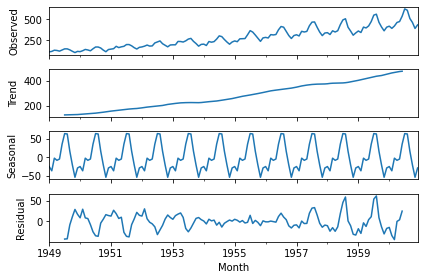

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(df,model='add').plot();

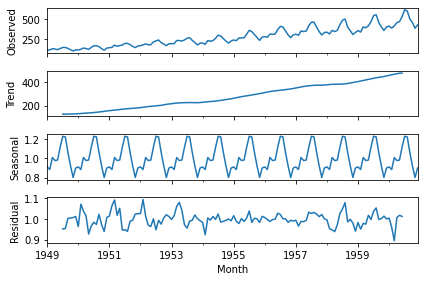

In [22]:
seasonal_decompose(df,model='mul').plot();

Here, I hvae used both model to decompse data into different time_series components!!

**Additive Model:**

An additive model suggests that the components are added together as follows:

y(t) = Level + Trend + Seasonality + Noise

An additive model is linear where changes over time are consistently made by the same amount.

A linear trend is a straight line.

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

**Multiplicative Model:**

A multiplicative model suggests that the components are multiplied together as follows:

y(t) = Level * Trend * Seasonality * Noise

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

## Train Test Split

Splitting data into trainset and testset.

In [26]:
len(df)

144

In [0]:
train_data = df.iloc[:108] # Goes up to but not including 108
test_data = df.iloc[108:]

## Multiplicative Model

In [0]:
#Model creation
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

## Model Evaluation

In [0]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

In [25]:
test_predictions

1958-01-01    356.739143
1958-02-01    343.561234
1958-03-01    403.996804
1958-04-01    397.853537
1958-05-01    406.415919
1958-06-01    479.824369
1958-07-01    529.820371
1958-08-01    524.772030
1958-09-01    454.714920
1958-10-01    391.965458
1958-11-01    345.259663
1958-12-01    395.243838
1959-01-01    407.506420
1959-02-01    392.453174
1959-03-01    461.489283
1959-04-01    454.471773
1959-05-01    464.252661
1959-06-01    548.107812
1959-07-01    605.218708
1959-08-01    599.451941
1959-09-01    519.425056
1959-10-01    447.745766
1959-11-01    394.393305
1959-12-01    451.490690
1960-01-01    465.498351
1960-02-01    448.302888
1960-03-01    527.163474
1960-04-01    519.147307
1960-05-01    530.320106
1960-06-01    626.108620
1960-07-01    691.346924
1960-08-01    684.759493
1960-09-01    593.344043
1960-10-01    511.464127
1960-11-01    450.519118
1960-12-01    515.741989
Freq: MS, Name: HW Forecast, dtype: float64

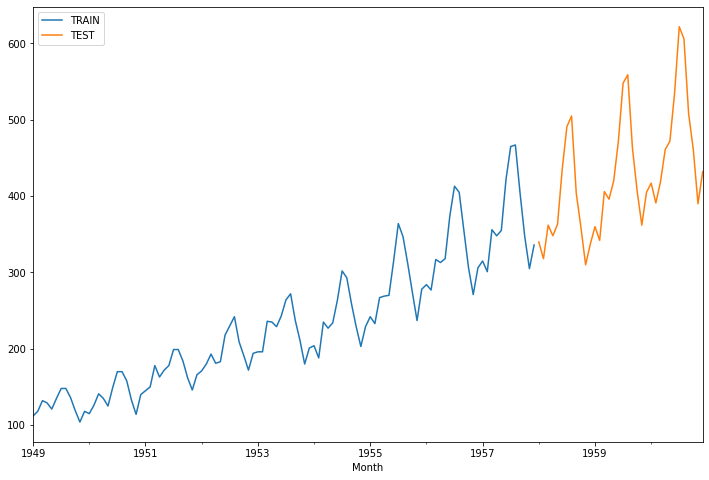

In [27]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

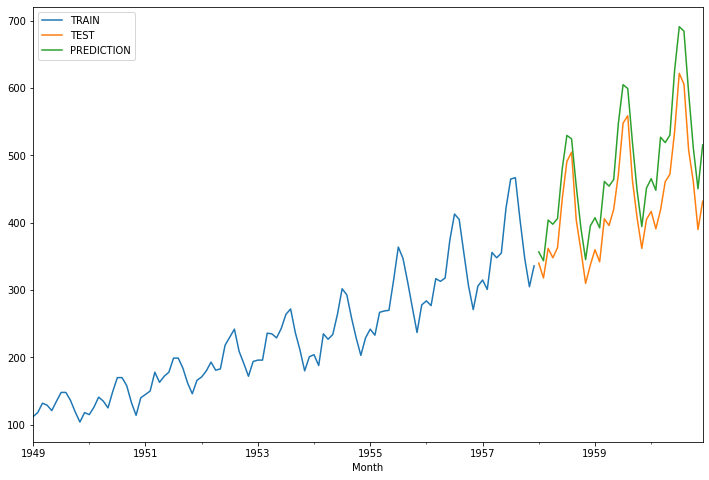

In [28]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

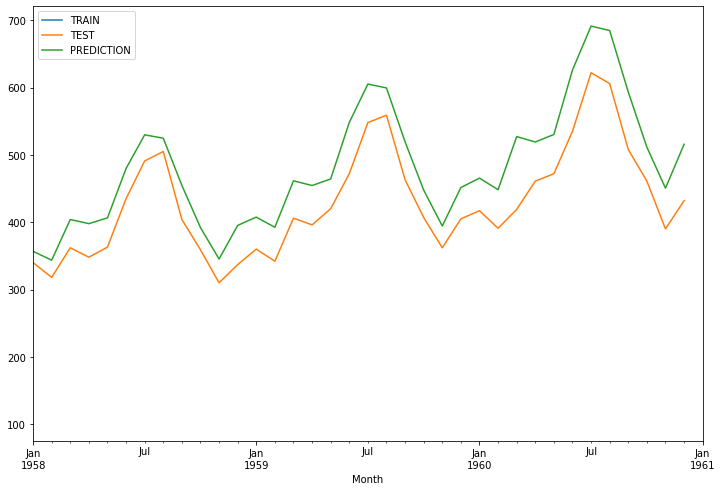

In [29]:
#lets zoom in to get a better view
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

## Evaluation Metrics

In [0]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [42]:
print('Multiplicative Model Evaluation')
print(f"MAE : {mean_absolute_error(test_data,test_predictions)}")
print(f"MSE : {mean_squared_error(test_data,test_predictions)}")
print(f"RMSE : {mean_squared_error(test_data,test_predictions)**.5}")

Multiplicative Model Evaluation
MAE : 53.16361991340851
MSE : 3200.583445912333
RMSE : 56.57369924189449


## Additive Model

In [37]:
add_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()

add_forecast = add_model.forecast(36).rename('HW ADD Model')

add_forecast

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


1958-01-01    360.142981
1958-02-01    349.402489
1958-03-01    402.854668
1958-04-01    395.138209
1958-05-01    402.078213
1958-06-01    465.364774
1958-07-01    504.032770
1958-08-01    498.853283
1958-09-01    433.630852
1958-10-01    377.738720
1958-11-01    339.098758
1958-12-01    387.902230
1959-01-01    398.745595
1959-02-01    388.005103
1959-03-01    441.457281
1959-04-01    433.740823
1959-05-01    440.680827
1959-06-01    503.967387
1959-07-01    542.635384
1959-08-01    537.455897
1959-09-01    472.233466
1959-10-01    416.341334
1959-11-01    377.701372
1959-12-01    426.504844
1960-01-01    437.348209
1960-02-01    426.607717
1960-03-01    480.059895
1960-04-01    472.343437
1960-05-01    479.283441
1960-06-01    542.570001
1960-07-01    581.237998
1960-08-01    576.058511
1960-09-01    510.836080
1960-10-01    454.943948
1960-11-01    416.303986
1960-12-01    465.107458
Freq: MS, Name: HW ADD Model, dtype: float64

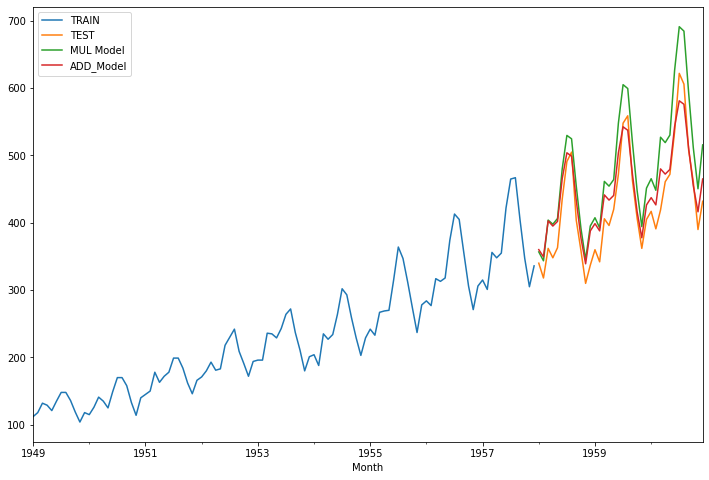

In [38]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='MUL Model')
add_forecast.plot(legend=True,label='ADD_Model')

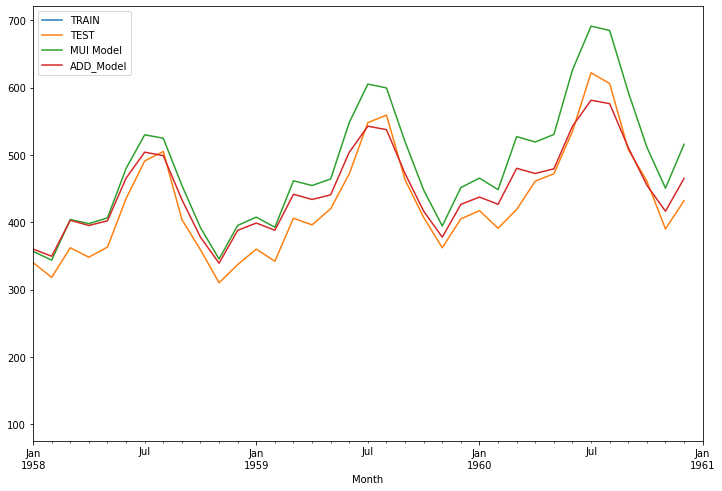

In [40]:
#lets zoom in to get a better view
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='MUl Model')
add_forecast.plot(legend=True,label='ADD_Model',xlim=['1958-01-01','1961-01-01']);

In [41]:
print('Additive Model Evaluation')
print(f"MAE : {mean_absolute_error(test_data,add_forecast)}")
print(f"MSE : {mean_squared_error(test_data,add_forecast)}")
print(f"RMSE : {mean_squared_error(test_data,add_forecast)**.5}")

Additive Model
MAE : 25.889941658674665
MSE : 882.5003582288601
RMSE : 29.70690758441309


In [46]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


Additive model outperformed multiplicative model in this case. I'll be using add model to forecast into Unknown Date!!

## Forecasting into Future!!

In [43]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [0]:
forecast_predictions = final_model.forecast(36)

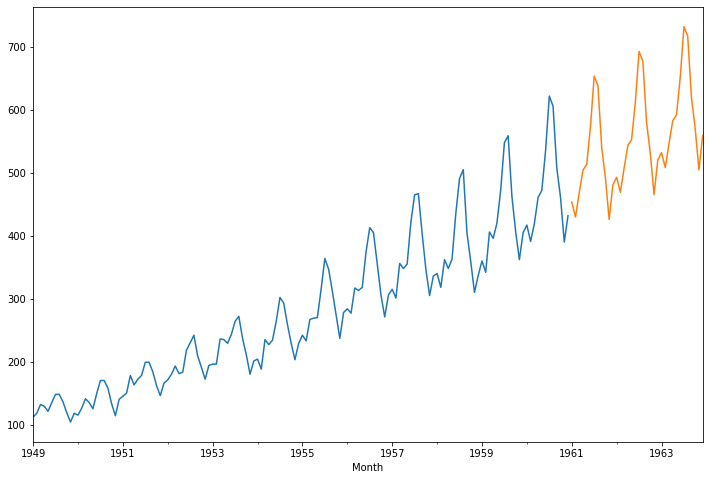

In [45]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();